In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [9]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

students_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [10]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


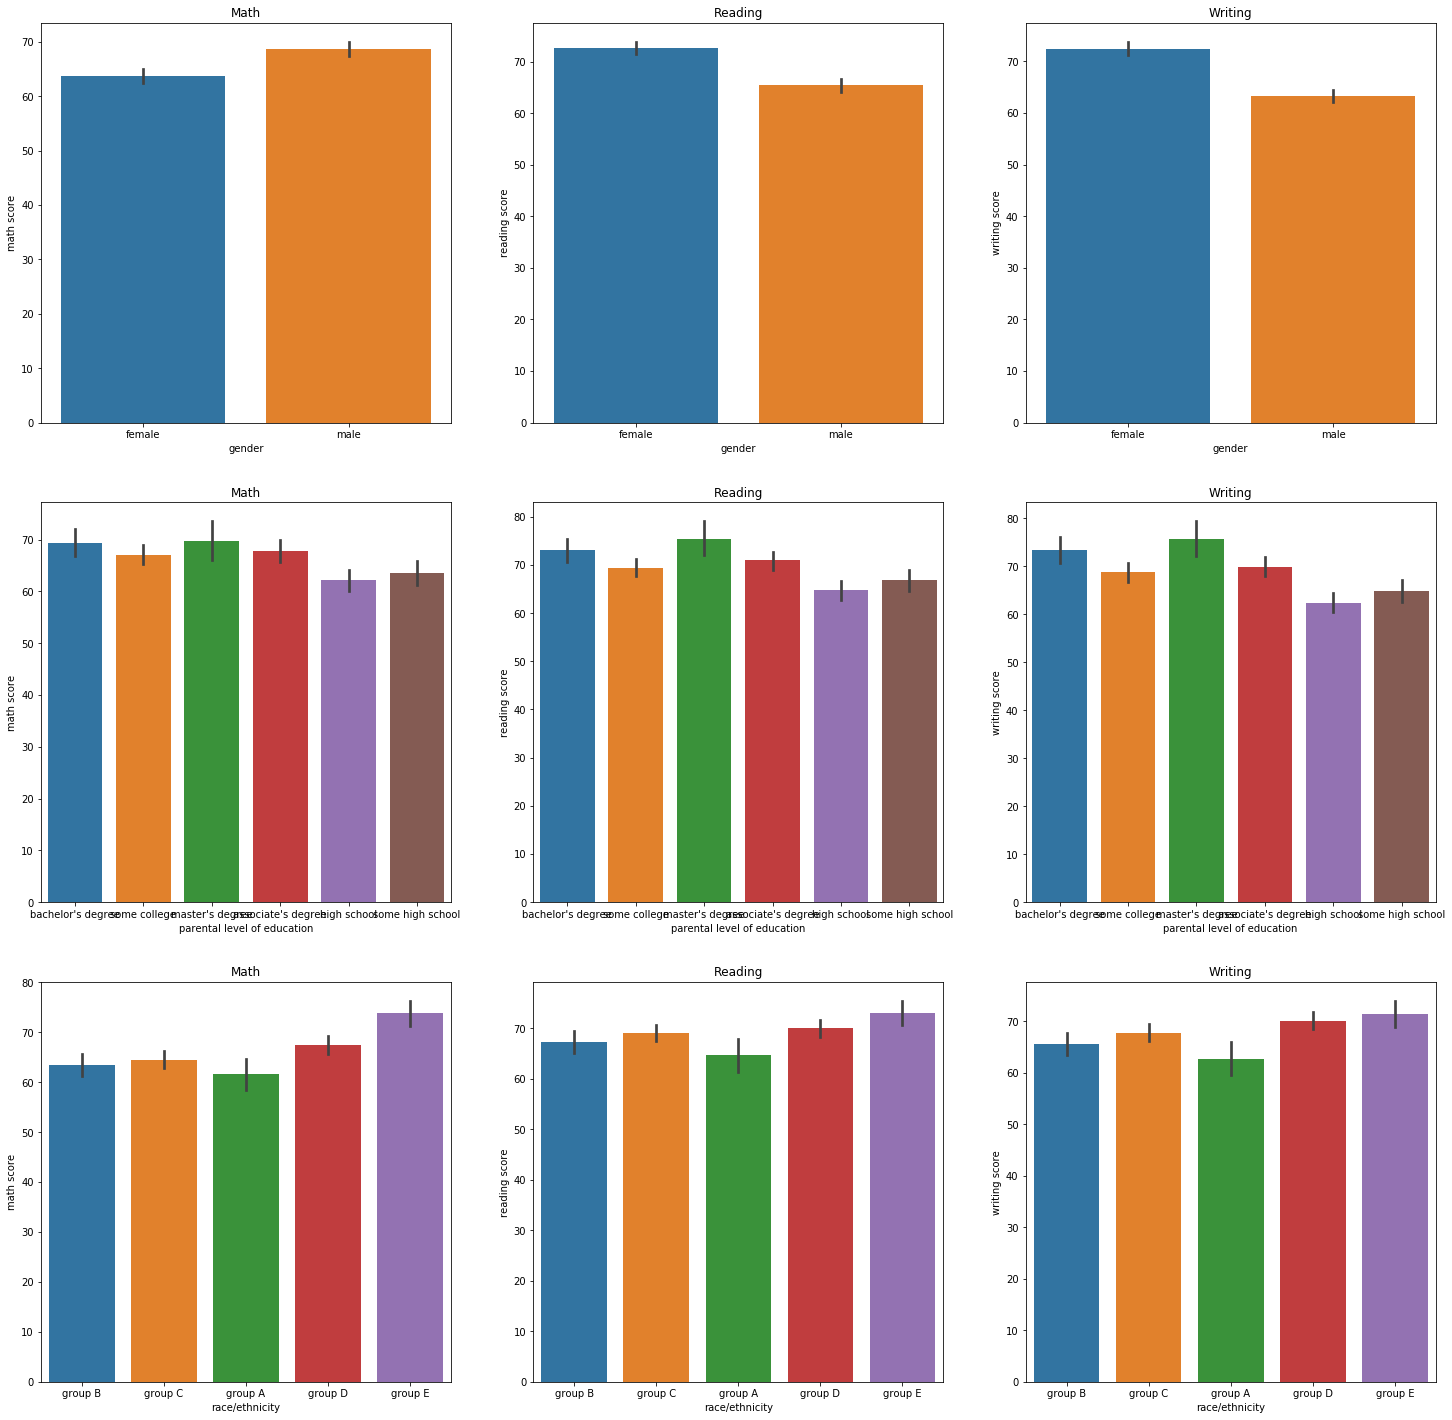

In [17]:
plt.figure(figsize=(25,25))

plt.subplot(3,3,1)
sns.barplot(students_df["gender"], students_df["math score"])
plt.title("Math")

plt.subplot(3,3,2)
sns.barplot(students_df["gender"], students_df["reading score"])
plt.title("Reading")

plt.subplot(3,3,3)
sns.barplot(students_df["gender"], students_df["writing score"])
plt.title("Writing")

plt.subplot(3,3,4)
sns.barplot(students_df["parental level of education"], students_df["math score"])
plt.title("Math")

plt.subplot(3,3,5)
sns.barplot(students_df["parental level of education"], students_df["reading score"])
plt.title("Reading")

plt.subplot(3,3,6)
sns.barplot(students_df["parental level of education"], students_df["writing score"])
plt.title("Writing")

plt.subplot(3,3,7)
sns.barplot(students_df["race/ethnicity"], students_df["math score"])
plt.title("Math")

plt.subplot(3,3,8)
sns.barplot(students_df["race/ethnicity"], students_df["reading score"])
plt.title("Reading")

plt.subplot(3,3,9)
sns.barplot(students_df["race/ethnicity"], students_df["writing score"])
plt.title("Writing")

plt.show()

For races, Group E was the best performing and group A was the lowest performing for math, reading, adn writing. For Math, males performed better but females were better in reading and writing. In terms of parent's education, the high school categories did the worst, whilst bachelor's degrees performed best.

In [18]:
students_df.groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


People with free or reduced lunch performed worse on the exams than standard lunches.

In [19]:
students_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


The reading and writing scores are definitely the most correlated, as you would expect.